In [50]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(np.random.randn(5, 3), 
                index=['a', 'c', 'e', 'f', 'h'],
                columns=['one', 'two', 'three'])
df

,one,two,three
a,0.960094,-0.558559,-0.207068
c,0.270063,-0.023779,-0.543676
e,-0.886605,1.468026,-0.221400
f,0.006306,1.418128,-0.542112
h,-0.873103,-1.860266,-1.138424


In [3]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three
a,0.960094,-0.558559,-0.207068
b,NaN,NaN,NaN
c,0.270063,-0.023779,-0.543676
d,NaN,NaN,NaN
e,-0.886605,1.468026,-0.221400
f,0.006306,1.418128,-0.542112
g,NaN,NaN,NaN
h,-0.873103,-1.860266,-1.138424


In [4]:
pd.isna(df2[['one','two']])

,one,two
a,False,False
b,True,True
c,False,False
d,True,True
e,False,False
f,False,False
g,True,True
h,False,False


In [5]:
pd.notna(df2[['one','two']])

,one,two
a,True,True
b,False,False
c,True,True
d,False,False
e,True,True
f,True,True
g,False,False
h,True,True


In [6]:
df2.isna()

,one,two,three
a,False,False,False
b,True,True,True
c,False,False,False
d,True,True,True
e,False,False,False
f,False,False,False
g,True,True,True
h,False,False,False


### **np.nan != np.nan**
### **None == np.nan.**

# Timestamp

In [7]:
df3 = df2.copy()
df3['timestamp'] = pd.Timestamp('20120101')
df3

,one,two,three,timestamp
a,0.960094,-0.558559,-0.207068,2012-01-01
b,NaN,NaN,NaN,2012-01-01
c,0.270063,-0.023779,-0.543676,2012-01-01
d,NaN,NaN,NaN,2012-01-01
e,-0.886605,1.468026,-0.221400,2012-01-01
f,0.006306,1.418128,-0.542112,2012-01-01
g,NaN,NaN,NaN,2012-01-01
h,-0.873103,-1.860266,-1.138424,2012-01-01


In [8]:
df3.loc[['a','c','h'],['one','timestamp']] = np.nan
df3

,one,two,three,timestamp
a,NaN,-0.558559,-0.207068,NaT
b,NaN,NaN,NaN,2012-01-01
c,NaN,-0.023779,-0.543676,NaT
d,NaN,NaN,NaN,2012-01-01
e,-0.886605,1.468026,-0.221400,2012-01-01
f,0.006306,1.418128,-0.542112,2012-01-01
g,NaN,NaN,NaN,2012-01-01
h,NaN,-1.860266,-1.138424,NaT


In [9]:
df3.get_dtype_counts()

float64           3
datetime64[ns]    1
dtype: int64

# Inserting missing data

## Numeric

In [10]:
sint = pd.Series([1, 2, 3])
sint.loc[0] = None
sint

0    NaN
1    2.0
2    3.0
dtype: float64

In [11]:
sint.loc[1] = np.nan
sint

0    NaN
1    NaN
2    3.0
dtype: float64

### Datetime

In [12]:
range_date = pd.date_range('1/3/2000', periods=11, freq='1D')
sdate = pd.Series(range_date)
sdate.loc[1] = None
sdate

0    2000-01-03
1           NaT
2    2000-01-05
3    2000-01-06
4    2000-01-07
5    2000-01-08
6    2000-01-09
7    2000-01-10
8    2000-01-11
9    2000-01-12
10   2000-01-13
dtype: datetime64[ns]

In [13]:
sdate.loc[2] = np.nan
sdate

0    2000-01-03
1           NaT
2           NaT
3    2000-01-06
4    2000-01-07
5    2000-01-08
6    2000-01-09
7    2000-01-10
8    2000-01-11
9    2000-01-12
10   2000-01-13
dtype: datetime64[ns]

### Object

In [14]:
schar = pd.Series(["a", "b", "c"])
schar.loc[0] = None
schar

0    None
1       b
2       c
dtype: object

In [15]:
schar.loc[1] = np.nan
schar

0    None
1     NaN
2       c
dtype: object

#### Object

# Filling missing data

In [16]:
fldf = df3.copy()
fldf

,one,two,three,timestamp
a,NaN,-0.558559,-0.207068,NaT
b,NaN,NaN,NaN,2012-01-01
c,NaN,-0.023779,-0.543676,NaT
d,NaN,NaN,NaN,2012-01-01
e,-0.886605,1.468026,-0.221400,2012-01-01
f,0.006306,1.418128,-0.542112,2012-01-01
g,NaN,NaN,NaN,2012-01-01
h,NaN,-1.860266,-1.138424,NaT


In [17]:
fldf.fillna(0)

,one,two,three,timestamp
a,0.000000,-0.558559,-0.207068,0
b,0.000000,0.000000,0.000000,2012-01-01 00:00:00
c,0.000000,-0.023779,-0.543676,0
d,0.000000,0.000000,0.000000,2012-01-01 00:00:00
e,-0.886605,1.468026,-0.221400,2012-01-01 00:00:00
f,0.006306,1.418128,-0.542112,2012-01-01 00:00:00
g,0.000000,0.000000,0.000000,2012-01-01 00:00:00
h,0.000000,-1.860266,-1.138424,0


In [18]:
fldf.fillna('not known')

,one,two,three,timestamp
a,not known,-0.558559,-0.207068,not known
b,not known,not known,not known,2012-01-01 00:00:00
c,not known,-0.0237795,-0.543676,not known
d,not known,not known,not known,2012-01-01 00:00:00
e,-0.886605,1.46803,-0.2214,2012-01-01 00:00:00
f,0.00630591,1.41813,-0.542112,2012-01-01 00:00:00
g,not known,not known,not known,2012-01-01 00:00:00
h,not known,-1.86027,-1.13842,not known


In [19]:
fldf.ffill()

,one,two,three,timestamp
a,NaN,-0.558559,-0.207068,NaT
b,NaN,-0.558559,-0.207068,2012-01-01
c,NaN,-0.023779,-0.543676,2012-01-01
d,NaN,-0.023779,-0.543676,2012-01-01
e,-0.886605,1.468026,-0.221400,2012-01-01
f,0.006306,1.418128,-0.542112,2012-01-01
g,0.006306,1.418128,-0.542112,2012-01-01
h,0.006306,-1.860266,-1.138424,2012-01-01


# Filling DataFrames

In [20]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))
dff

,A,B,C
0,0.116488,1.225691,0.173887
1,0.239900,0.136066,0.802320
2,-0.927669,0.254008,0.073859
3,-1.172665,1.183801,0.419254
4,0.058190,-0.227458,0.120529
5,-0.032544,0.425379,0.412735
6,0.320936,0.292775,-1.462614
7,-1.006213,0.081576,0.252088
8,0.274796,1.050394,0.801815
9,-0.612030,-0.270552,-2.063030


In [21]:
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6,1] = np.nan
dff.iloc[5:8,2] = np.nan
dff

,A,B,C
0,0.116488,1.225691,0.173887
1,0.239900,0.136066,0.802320
2,-0.927669,0.254008,0.073859
3,NaN,1.183801,0.419254
4,NaN,NaN,0.120529
5,-0.032544,NaN,NaN
6,0.320936,0.292775,NaN
7,-1.006213,0.081576,NaN
8,0.274796,1.050394,0.801815
9,-0.612030,-0.270552,-2.063030


In [22]:
dff.fillna(dff.mean())

,A,B,C
0,0.116488,1.225691,0.173887
1,0.239900,0.136066,0.802320
2,-0.927669,0.254008,0.073859
3,-0.203292,1.183801,0.419254
4,-0.203292,0.494220,0.120529
5,-0.032544,0.494220,0.046948
6,0.320936,0.292775,0.046948
7,-1.006213,0.081576,0.046948
8,0.274796,1.050394,0.801815
9,-0.612030,-0.270552,-2.063030


In [23]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,0.116488,1.225691,0.173887
1,0.239900,0.136066,0.802320
2,-0.927669,0.254008,0.073859
3,NaN,1.183801,0.419254
4,NaN,0.494220,0.120529
5,-0.032544,0.494220,0.046948
6,0.320936,0.292775,0.046948
7,-1.006213,0.081576,0.046948
8,0.274796,1.050394,0.801815
9,-0.612030,-0.270552,-2.063030


In [24]:
pd.notna(dff)

,A,B,C
0,True,True,True
1,True,True,True
2,True,True,True
3,False,True,True
4,False,False,True
5,True,False,False
6,True,True,False
7,True,True,False
8,True,True,True
9,True,True,True


# Dropping Na

In [25]:
dpdf = dff.copy()
dpdf

,A,B,C
0,0.116488,1.225691,0.173887
1,0.239900,0.136066,0.802320
2,-0.927669,0.254008,0.073859
3,NaN,1.183801,0.419254
4,NaN,NaN,0.120529
5,-0.032544,NaN,NaN
6,0.320936,0.292775,NaN
7,-1.006213,0.081576,NaN
8,0.274796,1.050394,0.801815
9,-0.612030,-0.270552,-2.063030


In [26]:
dpdf.dropna()

,A,B,C
0,0.116488,1.225691,0.173887
1,0.239900,0.136066,0.802320
2,-0.927669,0.254008,0.073859
8,0.274796,1.050394,0.801815
9,-0.612030,-0.270552,-2.063030


In [27]:
dpdf.dropna(axis="index")

,A,B,C
0,0.116488,1.225691,0.173887
1,0.239900,0.136066,0.802320
2,-0.927669,0.254008,0.073859
8,0.274796,1.050394,0.801815
9,-0.612030,-0.270552,-2.063030


In [28]:
dpdf.A.interpolate()

0    0.116488
1    0.239900
2   -0.927669
3   -0.629294
4   -0.330919
5   -0.032544
6    0.320936
7   -1.006213
8    0.274796
9   -0.612030
Name: A, dtype: float64

In [29]:
dpdf.A.plot()

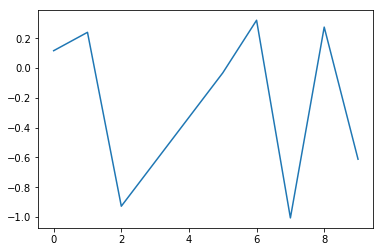

In [30]:
dpdf.A.interpolate().plot()

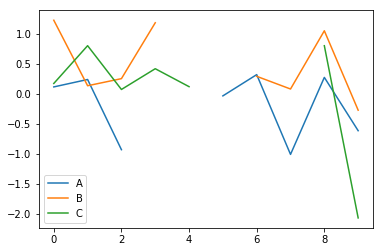

In [31]:
dpdf.plot()

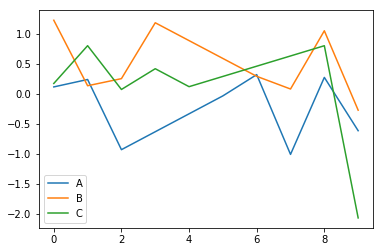

In [32]:
dpdf.interpolate().plot()

In [33]:
rng1 = pd.date_range('1/3/2000', periods=10, freq='40D')
indf = pd.DataFrame(np.random.rand(10),
                    columns=['value'],
                    index=rng1)
indf

,value
2000-01-03,0.650519
2000-02-12,0.642082
2000-03-23,0.957391
2000-05-02,0.419635
2000-06-11,0.537506
2000-07-21,0.174778
2000-08-30,0.862040
2000-10-09,0.170852
2000-11-18,0.694311
2000-12-28,0.968242


In [34]:
indf.iloc[3:5,0] = np.nan
indf.iloc[8:9,0] = np.nan

indf

,value
2000-01-03,0.650519
2000-02-12,0.642082
2000-03-23,0.957391
2000-05-02,NaN
2000-06-11,NaN
2000-07-21,0.174778
2000-08-30,0.862040
2000-10-09,0.170852
2000-11-18,NaN
2000-12-28,0.968242


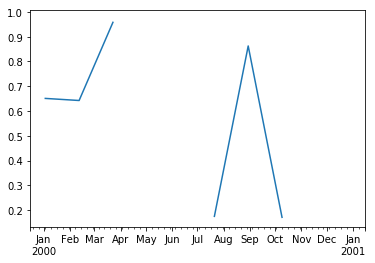

In [35]:
indf.value.plot()

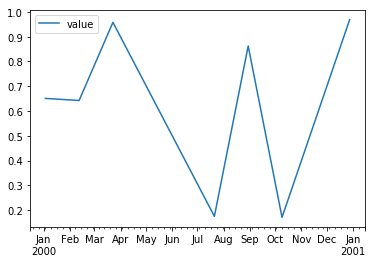

In [36]:
indf.interpolate().plot()

# Replacing Values

In [37]:
rdf = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})
rdf

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [38]:
rdf.replace({'a': 3, 'b': 5}, 100)

,a,b
0,0,100
1,1,6
2,2,7
3,100,8
4,4,9


In [39]:
rdf.replace([1, 3], method='pad')

,a,b
0,0,5
1,0,6
2,2,7
3,2,8
4,4,9


# String Replacement missing value

In [40]:
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}
rpdf = pd.DataFrame(d)
rpdf

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [41]:
rpdf.shape

(4, 3)

In [42]:
rpdf.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [43]:
rpdf.replace(['a', '.'], ['b', np.nan])

,a,b,c
0,0,b,b
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


# Numeric Replacement missing value

In [44]:
ndf = pd.DataFrame(np.random.randn(10, 2))
ndf

,0,1
0,0.967468,-0.853466
1,1.199231,-0.020831
2,0.619720,-0.019071
3,0.112967,1.313023
4,-1.219942,-1.330456
5,-0.136429,0.515066
6,-1.071463,-0.172231
7,1.381871,1.243564
8,-0.214460,-0.459214
9,0.063517,0.190051


In [45]:
ndf.shape

(10, 2)

In [46]:
ndf[np.random.rand(ndf.shape[0]) > 0.5] = 1.5
ndf

,0,1
0,1.500000,1.500000
1,1.500000,1.500000
2,0.619720,-0.019071
3,0.112967,1.313023
4,-1.219942,-1.330456
5,1.500000,1.500000
6,-1.071463,-0.172231
7,1.500000,1.500000
8,-0.214460,-0.459214
9,0.063517,0.190051


In [47]:
ndf.replace(1.5, 'less than 1.5')

,0,1
0,less than 1.5,less than 1.5
1,less than 1.5,less than 1.5
2,0.61972,-0.019071
3,0.112967,1.31302
4,-1.21994,-1.33046
5,less than 1.5,less than 1.5
6,-1.07146,-0.172231
7,less than 1.5,less than 1.5
8,-0.21446,-0.459214
9,0.0635171,0.190051


In [48]:
df00 = ndf.values[0, 0]
df00

1.5

## Replacing more than one value 

In [49]:
ndf.replace([1.5,df00], 'less than 1.5')

,0,1
0,less than 1.5,less than 1.5
1,less than 1.5,less than 1.5
2,0.61972,-0.019071
3,0.112967,1.31302
4,-1.21994,-1.33046
5,less than 1.5,less than 1.5
6,-1.07146,-0.172231
7,less than 1.5,less than 1.5
8,-0.21446,-0.459214
9,0.0635171,0.190051
